In [347]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

From [stackoverflow](https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe), a method to see what I'm printing for series!

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [2]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.Activity.value_counts(normalize = True)

1    0.542255
0    0.457745
Name: Activity, dtype: float64

In [6]:
df.shape

(3751, 1777)

In [348]:
df.isnull().sum()

Activity    0
D1          0
D2          0
D3          0
D4          0
           ..
D1772       0
D1773       0
D1774       0
D1775       0
D1776       0
Length: 1777, dtype: int64

In [8]:
print(df.nunique(axis=0))
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Activity       2
D1            24
D2          1768
D3            15
D4             5
            ... 
D1772          2
D1773          2
D1774          2
D1775          2
D1776          2
Length: 1777, dtype: int64


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are a large number of columns that only have 0/1 inputs. There is some possibility of data leakage with these, given that I don't know what they are describing truly. When modelling, I should experiment with removing the columns with an nunique of only 2, and perhaps randomly include some of them to remove in a few iterations, to see if it improves the fit.

In [4]:
binary_cols = df.columns[df.isin([0,1]).all()]
binary_cols = binary_cols[1:]

In [10]:
binary_cols

Index(['D23', 'D27', 'D28', 'D51', 'D72', 'D94', 'D170', 'D568', 'D858',
       'D952',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=834)

In [11]:
first_ten = df[['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']]

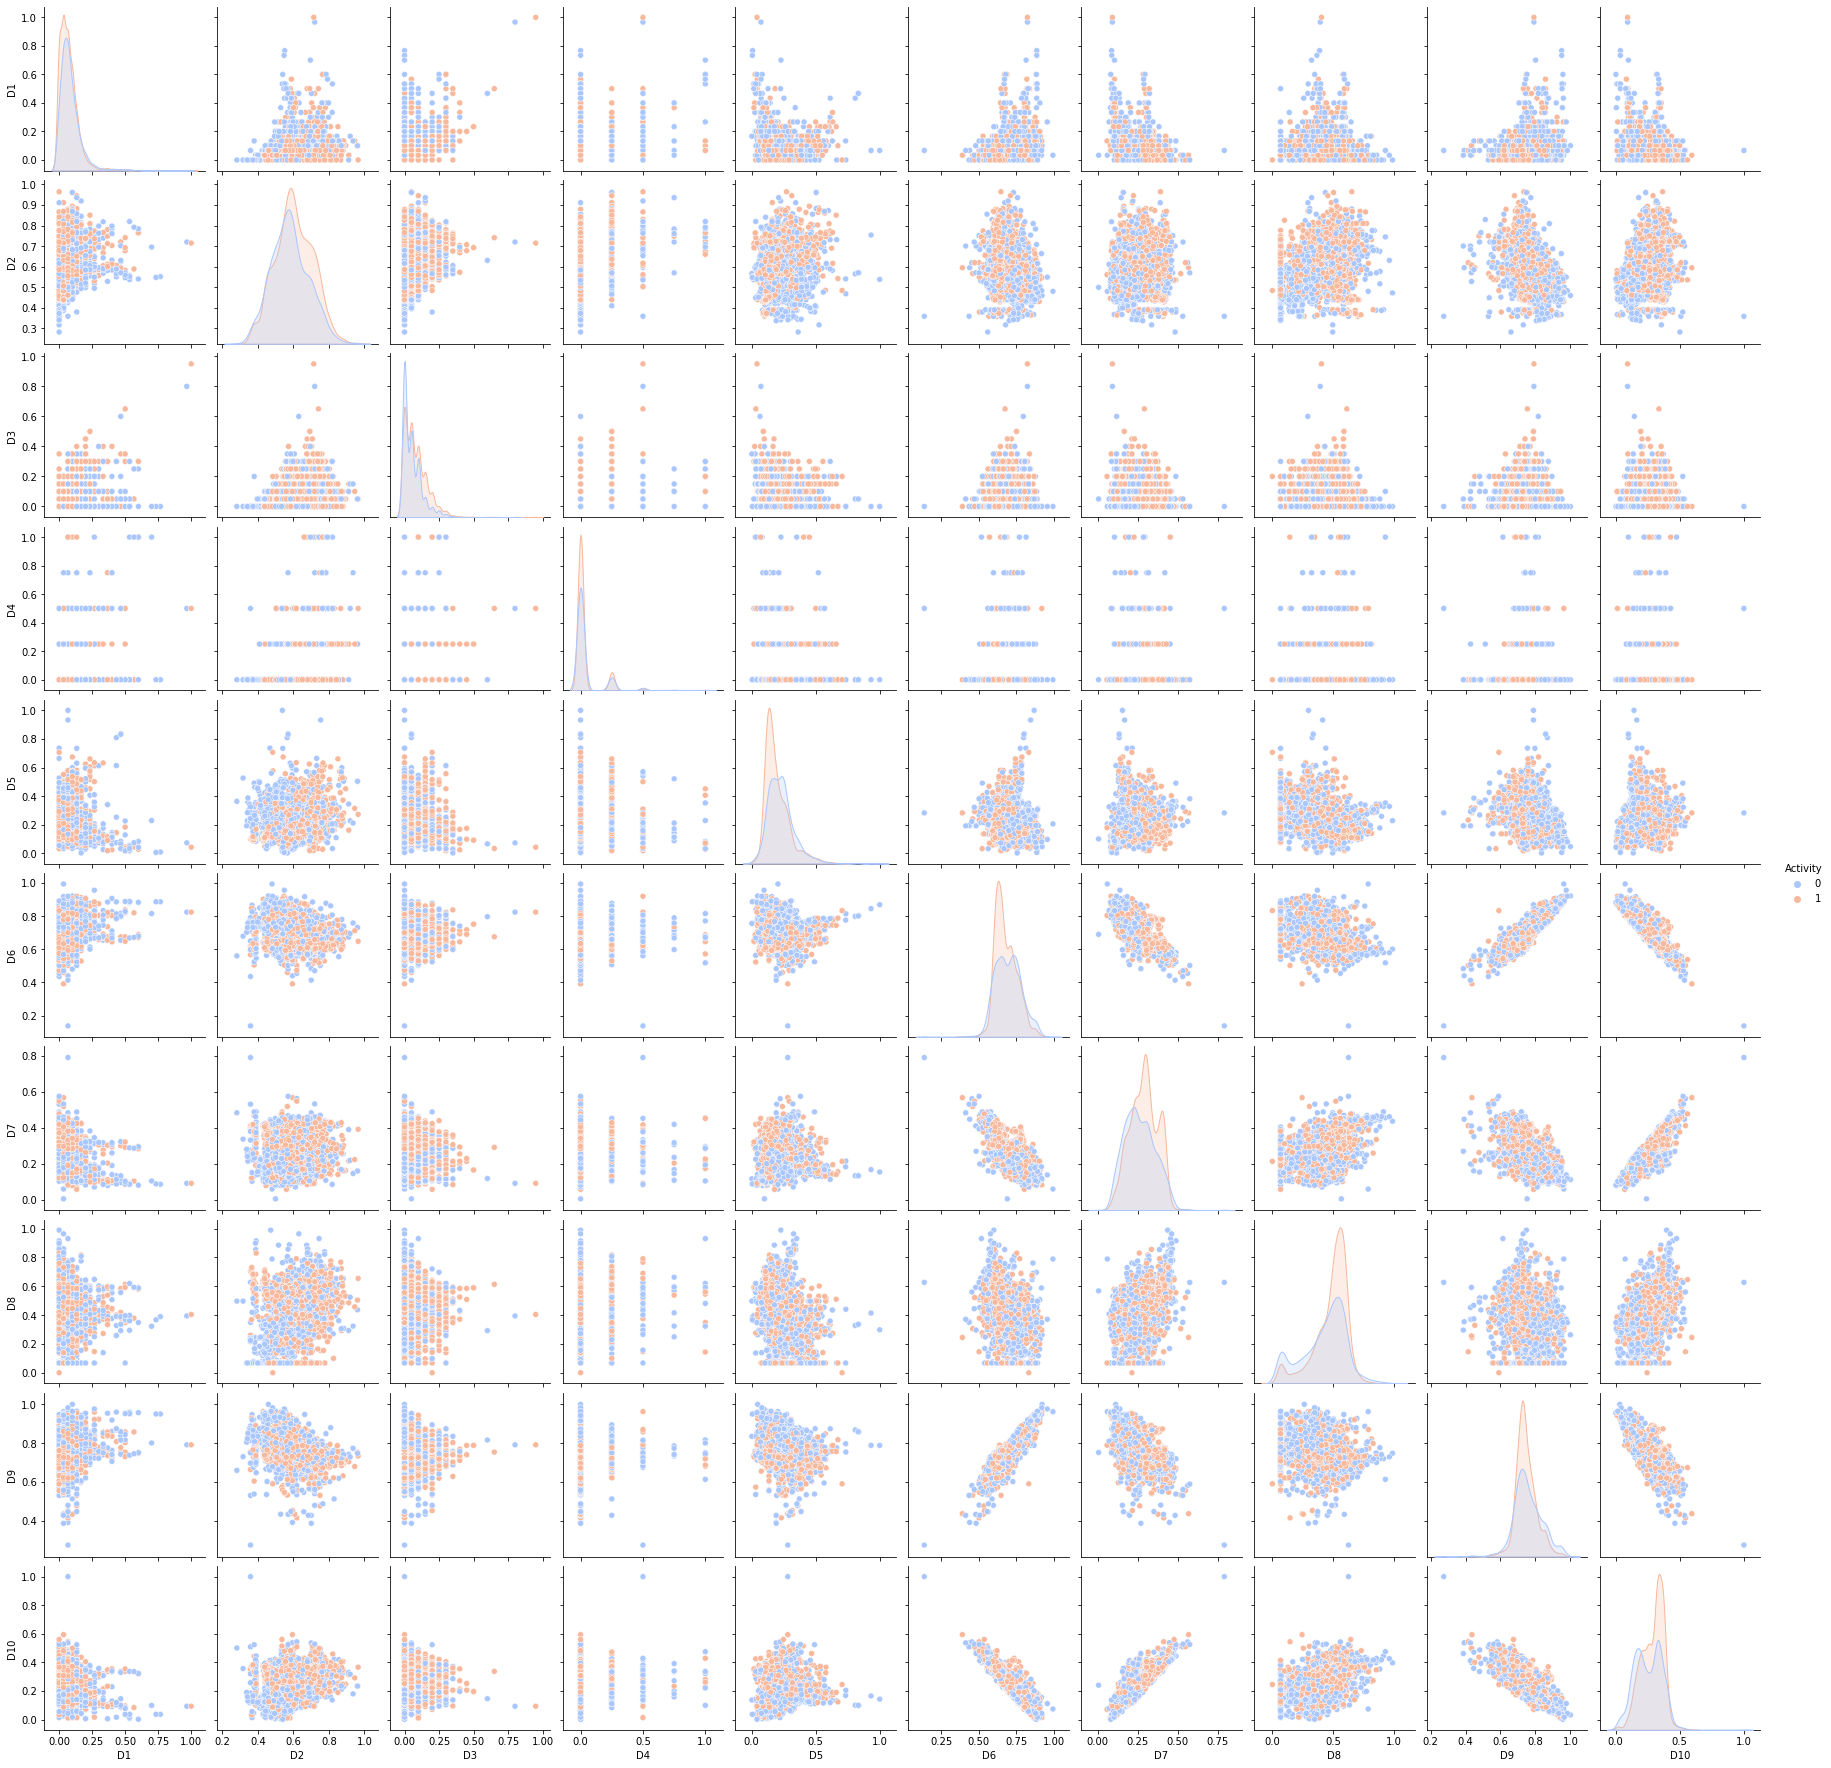

In [12]:
sns.pairplot(first_ten, hue = 'Activity', palette = 'coolwarm')

With a cursory analysis, it looks like at least the first ten features have almost complete overlap in terms of the activation target. There are likely going to be a very large number of weak predictors in this model, which means a heavy use of regularization will be required. I will search just one more set of ten to see again.

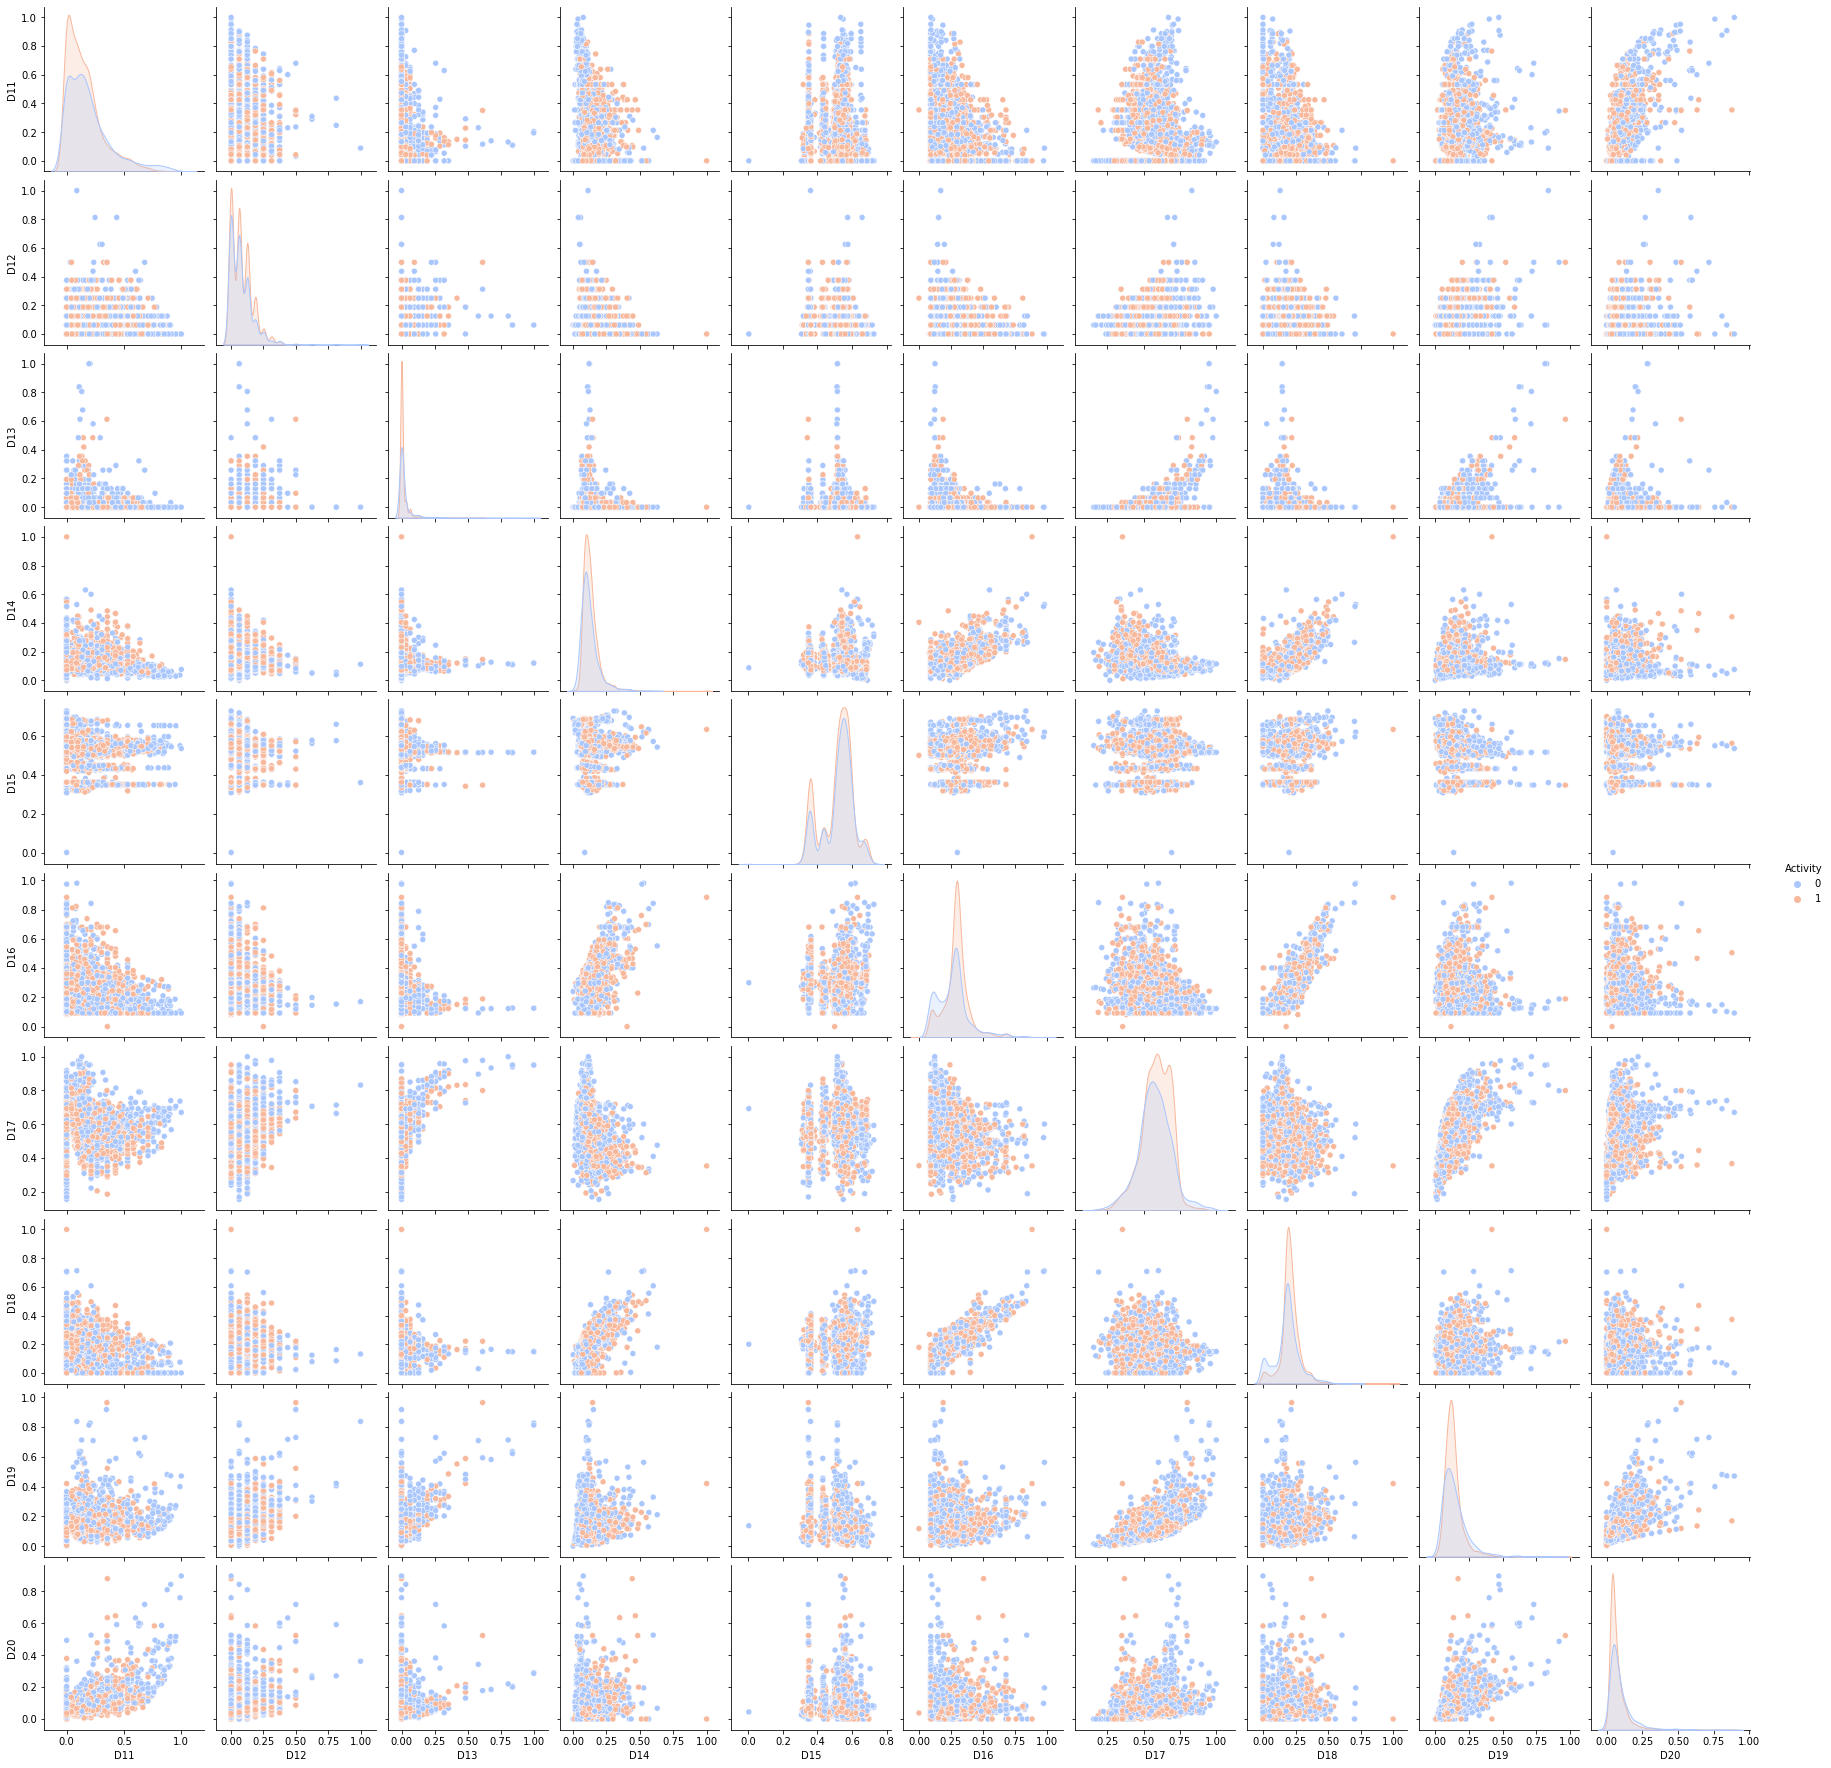

In [13]:
second_ten = df[['Activity', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20']]

sns.pairplot(second_ten, hue = 'Activity', palette = 'coolwarm');

Idea from [this post](https://stackoverflow.com/questions/52497451/compute-correlation-between-features-and-target-variable)

In [6]:
best_corr=df.corr()
correlation = best_corr.Activity.sort_values(ascending=False)

In [320]:
best_learners_pos = correlation.index[1:16].values.tolist()
best_learners_neg = correlation.index[-15:].values.tolist()

In [290]:
best_learners = best_learners_pos + best_learners_neg
best_learners

['D27',
 'D469',
 'D182',
 'D747',
 'D659',
 'D146',
 'D607',
 'D209',
 'D660',
 'D596',
 'D103',
 'D129',
 'D175',
 'D173',
 'D61',
 'D60',
 'D158',
 'D187',
 'D87',
 'D217']

It appears that most of these features will be relatively weak learners. I suspect that pretty much the only model that will perform with any level of success will be a neural network, as it is likely the only model sophisticated enough to pick up on the minute signal that each feature may present. Having said that, I will still prepare and model on multiple different classifiers estimators.

## Preparation of data for modelling
---

- Train test and split for evaluation. The data is nearly balanced, but I will still stratify to be certain to get representative samples. Since interpretation would be nearly impossible to discuss anyway (since I do not know what any of the chemical properties are or what a "change in D1" means, for example, I may as well scale the data for all cases as well. 

- The best fit on preliminary fitting will then be boosted. Finally, a neural network will be attempted.

In [321]:
X = df.drop(columns = 'Activity')
y = df.Activity

In [322]:
X_no_binary = X.drop(columns = binary_cols)

In [323]:
X_best_learners = X[best_learners]

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [325]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_no_binary, y, stratify = y, test_size = 0.2, random_state = 42)

In [326]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best_learners, y, stratify = y, test_size = 0.2,
                                                                       random_state = 42)

In [327]:
ss = StandardScaler()

In [328]:
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [329]:
ss_bin = StandardScaler()

In [330]:
Z_train_bin = ss_bin.fit_transform(X_train_bin)
Z_test_bin = ss_bin.transform(X_test_bin)

In [331]:
ss_best = StandardScaler()

In [332]:
Z_train_best = ss_best.fit_transform(X_train_best)
Z_test_best = ss_best.transform(X_test_best)

As a reminder, binary_cols was defined earlier. Nearly half of the features are binary. If the models severly overfit, I will ranodmly remove some of those features from X in evaluating model performance.

The metric of success, per the kaggle competition, is the [log_loss metric](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), which is essentially a measurement of the accuracy of the probabilities created. 

## Logistic Regression
---

In [132]:
logreg = LogisticRegression()

In [23]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [133]:
logreg_params = {'max_iter':[300], 'penalty':['l1', 'l2'], 'solver':['liblinear'], 'C':[10, 1, 0.1, 0.01]}

In [134]:
logreg_gs = GridSearchCV(logreg, logreg_params, cv = 5)

In [135]:
logreg_gs.fit(Z_train_best, y_train_best)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 1, 0.1, 0.01], 'max_iter': [300],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [136]:
logreg_gs.best_params_

{'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}

In [138]:
logreg_gs.score(Z_train_best, y_train_best), logreg_gs.score(Z_test_best, y_test_best)

(0.758, 0.7310252996005326)

In [139]:
probs = logreg_gs.predict_proba(Z_test_best)[:, 1]
probs[:10]

train_probs = logreg_gs.predict_proba(Z_train_best)[:, 1]

In [149]:
probs = logreg_gs.predict_proba(Z_test_best)[:, 1]

train_probs = logreg_gs.predict_proba(Z_train_best)[:, 1]

log_loss(y_train_best, train_probs), log_loss(y_test_best, probs)

(0.5149528923265763, 0.5598866898827938)

While the model's accuracy is over 75% on test data (well over baseline), this still shows high variance. Worse still, the log_loss score for the test data is incredibly poor, leading to low confidence in the probabilties generated by this model.

## KNN Classifier
---

In [141]:
knn = KNeighborsClassifier()

In [142]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [143]:
knn_params = {'p':[1, 2], 'weights':['uniform', 'distance'], 'n_neighbors':[3, 5, 7, 10], 'n_jobs':[-1]}

In [144]:
knn_gs = GridSearchCV(knn, knn_params, cv = 5)

In [145]:
knn_gs.fit(Z_train_best, y_train_best)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [3, 5, 7, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [146]:
knn_gs.best_params_

{'n_jobs': -1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [147]:
knn_gs.score(Z_train_best, y_train_best), knn_gs.score(Z_test_best, y_test_best)

(0.9993333333333333, 0.7536617842876165)

In [148]:
probs = knn_gs.predict_proba(Z_test_best)[:, 1]

train_probs = knn_gs.predict_proba(Z_train_best)[:, 1]

log_loss(y_train_best, train_probs), log_loss(y_test_best, probs)

(0.0009241962407475916, 1.283895618630899)

This model still performs poorly in terms of the log_loss function on unseen data. It also shows evidence of severe overfitting. I am curious if I can identify data leakage by removing the binary values. It is more likely that there are just a large majority of weak learners in this dataset, but I will attempt this first to evaluate.

In [38]:
knn_bin = KNeighborsClassifier()
knn_params = {'p':[1, 2], 'weights':['uniform', 'distance'], 'n_neighbors':[3, 5, 7, 10], 'n_jobs':[-1]}
knn_bin_gs = GridSearchCV(knn_bin, knn_params, cv = 5)

In [39]:
knn_bin_gs.fit(Z_train_bin, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [3, 5, 7, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [40]:
knn_bin_gs.best_params_

{'n_jobs': -1, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [41]:
knn_bin_gs.score(Z_train_bin, y_train_bin), knn_bin_gs.score(Z_test_bin, y_test)

(1.0, 0.7416777629826897)

In [259]:
probs = knn_bin_gs.predict_proba(Z_test_bin)[:, 1]

train_probs = knn_bin_gs.predict_proba(Z_train_bin)[:, 1]

log_loss(y_train_bin, train_probs), log_loss(y_test_bin, probs)

(9.992007221626413e-16, 1.3877141770811754)

Removing the binary features has no effect on the overfitting. I can conclude therefore that this dataset simply contain a vast majority of weak learners. For the sake of thoroughness, I will still attempt a few more models, but with the possible exception of a support vector classifier, I do not expect any improvement of results except for a neural network.

## Random Forest Classifier
----

In [261]:
#I will not gridsearch over this model as it is very time demanding
rf = RandomForestClassifier(min_samples_leaf = 50, n_estimators = 120, n_jobs = -1)

In [262]:
rf.fit(Z_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=120, n_jobs=-1)

In [263]:
rf.score(Z_train, y_train), rf.score(Z_test, y_test)

(0.783, 0.7336884154460719)

In [264]:
probs = rf.predict_proba(Z_test)[:, 1]

train_probs = rf.predict_proba(Z_train)[:, 1]

log_loss(y_train, train_probs), log_loss(y_test, probs)

(0.5189332112195159, 0.5569944177615513)

In [272]:
rf_best = RandomForestClassifier()

In [273]:
rf_best_params = {'min_samples_leaf':[20, 30, 50], 'n_estimators':[125, 150], 'n_jobs':[-1], 'ccp_alpha':[0.0, 0.01, 0.1]}
rf_best_gs = GridSearchCV(rf_best, rf_best_params, cv = 3)

In [274]:
rf_best_gs.fit(Z_train_best, y_train_best)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [20, 30, 50],
                         'n_estimators': [125, 150], 'n_jobs': [-1]})

In [276]:
rf_best_gs.score(Z_train_best, y_train_best), rf_best_gs.score(Z_test_best, y_test_best)

(0.8043333333333333, 0.7576564580559254)

In [277]:
probs = rf_best_gs.predict_proba(Z_test_best)[:,1]
train_probs = rf_best_gs.predict_proba(Z_train_best)[:, 1]

log_loss(y_train_best, train_probs), log_loss(y_test_best, probs)

(0.442670743573403, 0.5197182503396633)

In [278]:
rf_best_gs.best_params_

{'ccp_alpha': 0.0, 'min_samples_leaf': 20, 'n_estimators': 125, 'n_jobs': -1}

## AdaBoost attempt - Random Forest and Gradient Boost
---

In [279]:
ada = AdaBoostClassifier(RandomForestClassifier(min_samples_leaf = 20, n_estimators = 125, n_jobs = -1))

In [280]:
ada.fit(Z_train_best, y_train_best)

AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_leaf=20,
                                                         n_estimators=125,
                                                         n_jobs=-1))

In [281]:
ada.score(Z_train_best, y_train_best), ada.score(Z_test_best, y_test_best)

(1.0, 0.7882822902796272)

In [282]:
probs = ada.predict_proba(Z_test_best)[:,1]
train_probs = ada.predict_proba(Z_train_best)[:, 1]

log_loss(y_train_best, train_probs), log_loss(y_test_best, probs)

(0.5850938277143172, 0.6390571730685877)

In [333]:
gradient = GradientBoostingClassifier()

In [334]:
gradient_params = {'max_depth': [6,8, 10],'min_samples_leaf':[20, 30, 50], 'n_estimators': [125, 150], 
                   'learning_rate': [0.3, .04, .06]}
gradient_gs = GridSearchCV(gradient, gradient_params, cv = 3)

In [335]:
gradient_gs.fit(Z_train_best, y_train_best)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.04, 0.06],
                         'max_depth': [6, 8, 10],
                         'min_samples_leaf': [20, 30, 50],
                         'n_estimators': [125, 150]})

In [336]:
gradient_gs.best_params_

{'learning_rate': 0.04,
 'max_depth': 6,
 'min_samples_leaf': 30,
 'n_estimators': 125}

In [337]:
gradient_gs.score(Z_train_best, y_train_best), gradient_gs.score(Z_test_best, y_test_best)

(0.8316666666666667, 0.7496671105193076)

In [338]:
probs = gradient_gs.predict_proba(Z_test_best)[:,1]
train_probs = gradient_gs.predict_proba(Z_train_best)[:, 1]

log_loss(y_train_best, train_probs), log_loss(y_test_best, probs)

(0.397088966955996, 0.5263310485271727)

The random forest has a much lower variance, but the bias is so much higher that the results are still poor. Still no improvement to the log loss function on unseen data.

## SVC
---

In [54]:
svc = SVC()

In [55]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [371]:
#I want the rbg function here
svc_params = {'C':[0.001, 0.01, 0.1, 1, 10], 'probability':[True]}
svc_gs = GridSearchCV(svc, svc_params, cv = 5)

In [ ]:
svc_gs.fit(Z_train, y_train)

In [ ]:
svc_gs.score(Z_train, y_train), svc_gs.score(Z_test, y_test)

In [270]:
# probs = svc_gs.predict_proba(Z_test)[:, 1]

# train_probs = svc_gs.predict_proba(Z_train)[:, 1]

# log_loss(y_train, train_probs), log_loss(y_test, probs)

Each and every classifier has performed equally poorly. I think the reason for this, after my analysis, is that this dataset contains nearly exclusively weak learners. In order to attempt a better method of picking up on subtle signals, I will now utilize a neural network.

## Neural Network
----

In [95]:
Z_train[0].shape, Z_test[0].shape

((1776,), (1776,))

In [26]:
#Input shape of all features
input_shape = Z_train[0].shape

In [202]:
#Input shape of the "best learners"
input_best = Z_train_best[0].shape

In [210]:
#Instantiate model
model = Sequential()

#Input layer
model.add(Dense(1600, activation = 'relu', input_shape = input_best, kernel_regularizer = l2(0.006)))
model.add(Dropout(0.15))

# model.add(Dense(1000, activation = 'relu', kernel_regularizer = l2(0.004)))
# model.add(Dropout(0.1))

model.add(Dense(800, activation = 'relu', kernel_regularizer = l2(0.006)))
model.add(Dropout(0.15))

model.add(Dense(400, activation = 'relu', kernel_regularizer = l2(0.006)))
model.add(Dropout(0.15))

model.add(Dense(200, activation = 'relu', kernel_regularizer = l2(0.006)))
model.add(Dropout(0.15))

model.add(Dense(100, activation = 'relu',  kernel_regularizer = l2(0.006)))
model.add(Dropout(0.15))

model.add(Dense(60, activation = 'relu', kernel_regularizer = l2(0.006)))
model.add(Dropout(0.15))

#output layer
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer = l2(0.006)))

#compile model - note that log loss and binary crossentropy are the same thing in this case
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [65]:
#Instead of hard coding, this will let me plot more effectively
num_epochs = 40

In [43]:
stop = EarlyStopping(min_delta = 0.01, patience = 5)

In [211]:
result = model.fit(Z_train_best, y_train_best, epochs = num_epochs, batch_size = 512, callbacks = stop,
                   validation_data = (Z_test_best, y_test_best))

Epoch 1/40
6/6 [==============================] - 0s 65ms/step - loss: 12.2463 - accuracy: 0.6490 - val_loss: 10.3753 - val_accuracy: 0.7124
Epoch 2/40
6/6 [==============================] - 0s 33ms/step - loss: 9.2815 - accuracy: 0.7297 - val_loss: 7.8425 - val_accuracy: 0.7284
Epoch 3/40
6/6 [==============================] - 0s 32ms/step - loss: 6.9765 - accuracy: 0.7553 - val_loss: 5.8983 - val_accuracy: 0.7337
Epoch 4/40
6/6 [==============================] - 0s 32ms/step - loss: 5.2528 - accuracy: 0.7597 - val_loss: 4.4785 - val_accuracy: 0.7403
Epoch 5/40
6/6 [==============================] - 0s 33ms/step - loss: 4.0044 - accuracy: 0.7643 - val_loss: 3.4434 - val_accuracy: 0.7417
Epoch 6/40
6/6 [==============================] - 0s 33ms/step - loss: 3.1023 - accuracy: 0.7673 - val_loss: 2.7202 - val_accuracy: 0.7364
Epoch 7/40
6/6 [==============================] - 0s 33ms/step - loss: 2.4583 - accuracy: 0.7687 - val_loss: 2.1964 - val_accuracy: 0.7457
Epoch 8/40
6/6 [=========

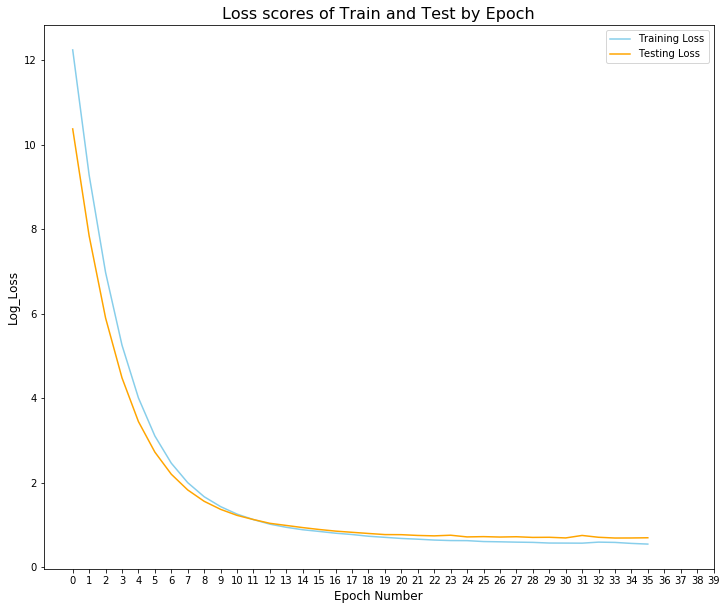

In [212]:
train_loss = result.history['loss']
test_loss = result.history['val_loss']

plt.figure(figsize = (12, 10))

plt.plot(train_loss, color = 'skyblue', label = 'Training Loss')
plt.plot(test_loss, color = 'orange', label = 'Testing Loss')

plt.title('Loss scores of Train and Test by Epoch', fontsize = 16)
plt.xlabel('Epoch Number', fontsize = 12)
plt.ylabel('Log_Loss', fontsize = 12)
plt.xticks(np.arange(num_epochs), np.arange(num_epochs))

plt.legend();

In [31]:
submission = pd.read_csv('data/test.csv')
#transfrom submission in similar way
submission.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


In [370]:
Z_submit = ss.transform(submission)

In [ ]:
prob

In [339]:
Z_best = ss_best.transform(submission[best_learners])

In [340]:
probs = gradient_gs.predict_proba(Z_best)[:,1]

In [1]:
# activity_submit = model.predict_classes(Z_submit)
# activity_submit = model.predict_classes(Z_best)

In [215]:
# activity_prob = model.predict(Z_submit)
activity_prob = model.predict(Z_best)

In [216]:
activity_prob[0][0]
probs = [activity_prob[i][0] for i in range(len(activity_prob))]

In [342]:
probs[:10]

array([0.72925415, 0.89885716, 0.44987981, 0.92272688, 0.19619525,
       0.34104526, 0.87423629, 0.72881467, 0.85569913, 0.19152797])

In [55]:
test = pd.read_csv('data/svm_benchmark.csv')
test

,MoleculeId,PredictedProbability
0,1,0.858294
1,2,0.867819
2,3,0.184781
3,4,0.831901
4,5,0.190208
...,...,...
2496,2497,0.463033
2497,2498,0.159634
2498,2499,0.903084
2499,2500,0.835431


In [343]:
ids = [i for i in range(1, len(submission) + 1)]

In [344]:
subdict = {}
subdict['MoleculeId'] = ids
subdict['PredictedProbability'] = probs
final = pd.DataFrame(subdict)

In [345]:
final

,MoleculeId,PredictedProbability
0,1,0.729254
1,2,0.898857
2,3,0.449880
3,4,0.922727
4,5,0.196195
...,...,...
2496,2497,0.757143
2497,2498,0.192288
2498,2499,0.870597
2499,2500,0.766889


In [346]:
final.to_csv('data/submission.csv', index = False)